In [1]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

In [2]:
reader = easyocr.Reader(['en'])

In [3]:
# result = reader.readtext('hello.png')
# a=np.array(result,dtype=object)
# result[0][1]

TN02 F 0630


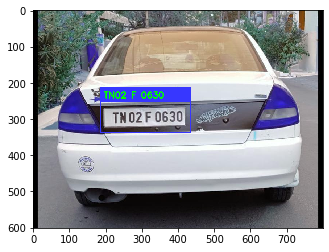

In [6]:
cascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")
img = cv2.imread('2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
nplate = cascade.detectMultiScale(img,1.1,4)

for (x,y,w,h) in nplate:
    a,b = ( int(0.02*img.shape[0]),int(0.025*img.shape[1]))
    plate = img[y+a:y+h-a,x-b:x+w+b]
    kernel = np.ones((1,1),np.uint8)
    plate =cv2.dilate(plate,kernel,iterations=1)
    plate =cv2.erode(plate,kernel,iterations=1)
    plate_gray = cv2.cvtColor(plate,cv2.COLOR_BGR2GRAY)
    (thresh,plate) = cv2.threshold(plate_gray, 128, 255, cv2.THRESH_OTSU)
    
#     read = pytesseract.image_to_string(plate)
    read = reader.readtext(plate)
    a = len(read)
    b=""
    for i in range(a):
        b = str(b) + str(read[i][1]).upper()
        
#     read= str(read).upper()
#     read= ''.join(e for e in read if e.isalnum())
    
    cv2.rectangle(img,(x,y),(x+w,y+h),(55,55,255),2)
    cv2.rectangle(img,(x,y-40),(x+w,y),(55,55,255),-1)
    cv2.putText(img,b,(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,.8,(0,255,0),2, cv2.LINE_AA)
    cv2.imshow('plate',plate)
    
cv2.imshow('result',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(img, cmap='gray',interpolation='nearest')

print (b)


In [85]:
nplate

array([[273, 382, 253,  85]], dtype=int32)

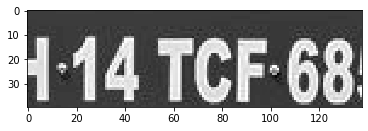

In [36]:
# for (x,y,w,h) in nplate:
#     a,b = ( int(0.02*img.shape[0]),int(0.025*img.shape[1]))
#     plate = img[y+a:y+h-a,x+b:x+w-b]
    
#     plt.imshow(plate, cmap='gray',interpolation='nearest')
#     kernel = np.ones((1,1),np.uint8)
#     plate =cv2.dilate(plate,kernel,1)
#     plate =cv2.erode(plate,kernel,1)
#     bfilter = cv2.bilateralFilter(plate, 11,17,17)
#     thresh,plate = cv2.threshold(plate, 128, 255, cv2.THRESH_OTSU)

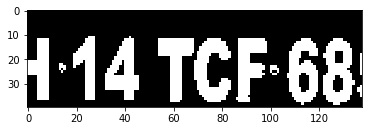

In [37]:
# plt.imshow(plate, cmap='gray',interpolation='nearest')

In [38]:
# result = reader.readtext(plate)